In [1]:
from model import load_tf_datasets, build_model, compile_train_model, evaluate_model

# Load Dataset

In [2]:
train_ds, val_ds, test_ds = load_tf_datasets(split_paradigm="70_20_10")

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
n_samples: 50844
n_batches: 1589
n_classes: 10
Classes: ['Bacterial_spot', 'Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold', 'Mosaic_virus', 'Septoria_leaf_spot', 'Spider_mites', 'Target_Spot', 'Yellow_Leaf_Curl_Virus']
Image Batch Shape: (32, 224, 224, 3)
Label Batch Shape: (32, 10)

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
n_samples: 3632
n_batches: 114
n_classes: 10
Classes: ['Bacterial_spot', 'Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold', 'Mosaic_virus', 'Septoria_leaf_spot', 'Spider_mites', 'Target_Spot', 'Yellow_Leaf_Curl_Virus']
Image Batch Shape: (32, 224, 224, 3)
Label Batch Shape: (32, 10)

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
n_samples: 1817
n_batches: 57
n_classes: 10
Classes: ['Bacterial_spot', 'Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold', 'Mosaic_virus', 'Septoria_leaf_spot', 'Spider_mites', 'Target_Spot', 'Yellow_Leaf_Curl_Virus']


# Model

## Architecture

In [3]:
model = build_model(model_name="MobileNetV3Small")

Model: "MobileNetV3Small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       590,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,596,218 (6.09 MB)

 Trainable params: 657,098 (2.51 MB)

 Non-trainable params: 939,120 (3.58 MB)

## Training

Epoch 1/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 226s 133ms/step - accuracy: 0.7883 - loss: 0.0880 - val_accuracy: 0.9394 - val_loss: 0.0205 - learning_rate: 0.0010
Epoch 2/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 236s 146ms/step - accuracy: 0.9212 - loss: 0.0252 - val_accuracy: 0.9444 - val_loss: 0.0185 - learning_rate: 0.0010
Epoch 3/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 178s 110ms/step - accuracy: 0.9384 - loss: 0.0182 - val_accuracy: 0.9565 - val_loss: 0.0149 - learning_rate: 0.0010
Epoch 4/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 177s 109ms/step - accuracy: 0.9530 - loss: 0.0132 - val_accuracy: 0.9551 - val_loss: 0.0169 - learning_rate: 0.0010
Epoch 5/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 217s 134ms/step - accuracy: 0.9596 - loss: 0.0104 - val_accuracy: 0.9650 - val_loss: 0.0109 - learning_rate: 0.0010
Epoch 6/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 222s 137ms/step - accuracy: 0.9640 - loss: 0.0087 - val_accuracy: 0.9675 - val_loss: 0.0117 - learning_rate: 0.0010
Epoch 7/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 186s 114ms

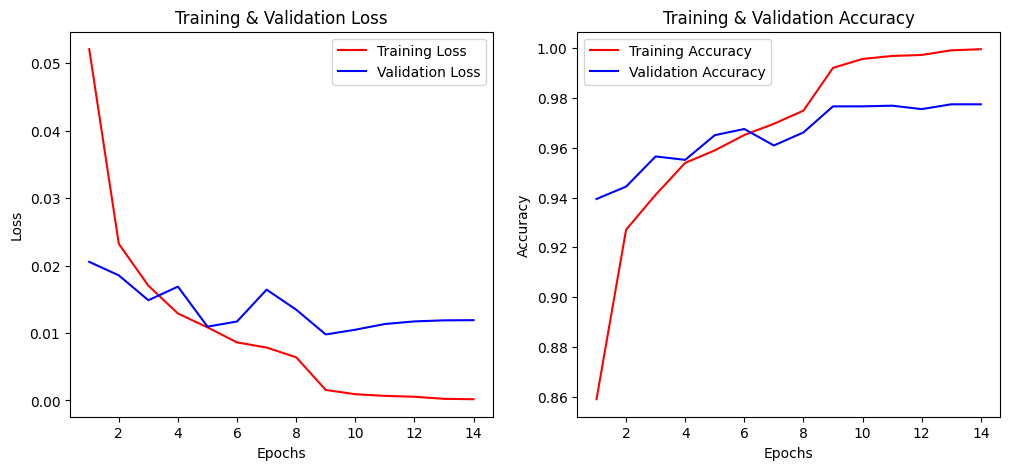

In [4]:
model = compile_train_model(model, train_ds, val_ds)

## Evaluation

57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.9771 - loss: 0.0168
Test Accuracy: 0.9758
Test Loss: 0.0140
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step


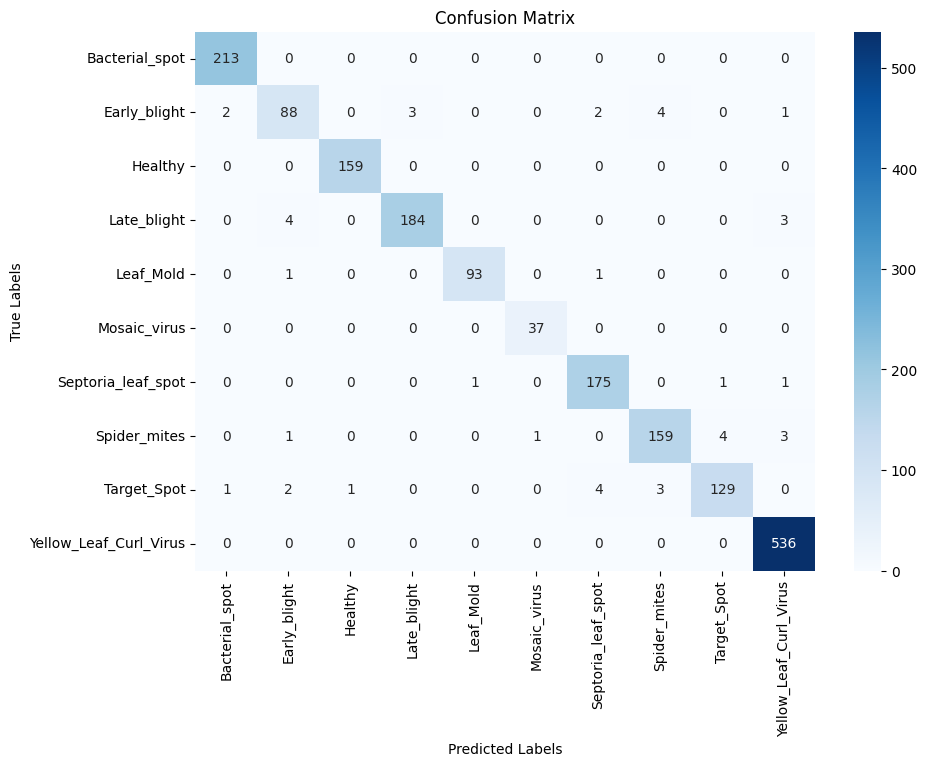

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       213
           1       0.92      0.88      0.90       100
           2       0.99      1.00      1.00       159
           3       0.98      0.96      0.97       191
           4       0.99      0.98      0.98        95
           5       0.97      1.00      0.99        37
           6       0.96      0.98      0.97       178
           7       0.96      0.95      0.95       168
           8       0.96      0.92      0.94       140
           9       0.99      1.00      0.99       536

    accuracy                           0.98      1817
   macro avg       0.97      0.97      0.97      1817
weighted avg       0.98      0.98      0.98      1817



In [5]:
evaluate_model(model, test_ds)